In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

In [2]:
# HIDDEN
n = 10000
a = -2
b = 2
z = stats.norm.rvs(size=n)
y = z**2 + stats.uniform.rvs(a, b-a, size=n)
xmin = min(z)
xmax = max(z)

In [3]:
# HIDDEN
def plot_curved_scatter():
    plt.scatter(z, y)
    plt.xlabel('$X$')
    plt.ylabel('$Y$', rotation=0)
    plt.xlim(-2, 2)
    plt.ylim(-3, 6);

## Conditional Expectation As a Projection ##

Suppose we are trying to predict the value of a random variable $Y$ based on a related random variable $X$. As you saw in Data 8, a natural method of prediction is to use the "center of the vertical strip" at the given value of $X$.

Formally, given $X=x$, we are proposing to predict $Y$ by $E(Y \mid X=x)$.

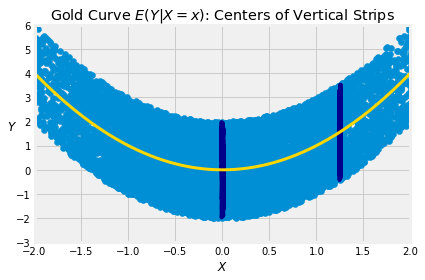

In [4]:
# NO CODE
plot_curved_scatter()
xstar = 1.25
ystar = 3
tbl = Table().with_columns('x', z, 'y', y)
strip1 = tbl.where('x', are.between(xstar-0.01, xstar+0.012))
plt.plot(strip1.column(0), strip1.column(1), color='darkblue')
strip2 = tbl.where('x', are.between(-0.01, 0.012))
plt.plot(strip2.column(0), strip2.column(1), color='darkblue')
x = np.arange(xmin, xmax+0.01, 0.01)
plt.plot(x, x**2, color='gold', lw=3)
plt.title('Gold Curve $E(Y | X=x)$: Centers of Vertical Strips');

The conditional expectation $E(Y \mid X)$ is the function of $X$ defined by

$$
b(x) ~ = ~ E(Y \mid X = x)
$$

We are using the letter $b$ to signifiy the "best guess" of $Y$ given the value of $X$. Later in this chapter we will make precise the sense in which it is the best. 

In random variable notation,

$$
E(Y \mid X) ~ = ~ b(X)
$$

For a point $(X, Y)$, the error in this guess is

$$
D_w = Y - b(X)
$$

The subscript $w$ reminds us that this error is a deviation *within* a vertical strip – it is the difference between $Y$ and the center of the strip at the given value of $X$.

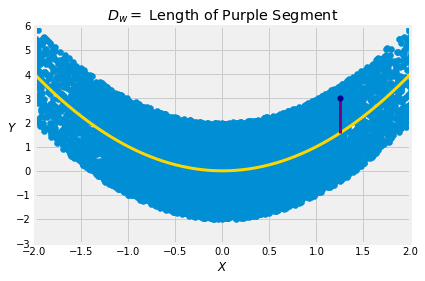

In [5]:
# NO CODE
plot_curved_scatter()
x = np.arange(xmin, xmax+0.01, 0.01)
#plt.plot([xmin, xmax], [1, 1], color='k', lw=3)
plt.plot(x, x**2, color='gold', lw=3)
xstar = 1.25
ystar = 3
plt.plot([xstar, xstar], [ystar, xstar**2], color='purple', lw=3)
#plt.plot([xstar, xstar], [xstar**2, 1], color='lime', lw=3)
plt.scatter(xstar, ystar, color='darkblue', s=30, zorder=3)
plt.title('$D_w = $ Length of Purple Segment')
plt.xlim(-2, 2)
plt.ylim(-3, 6);

To find properties of $b(X)$ as an estimate of $Y$ it will be helpful to recall some properties of conditional expectation. 

### Conditional Expectation: Review ###
The properties of conditional expectation are analogous to those of expectation, but the identities are of random variables, not real numbers. There are also some additional properties due to the aspect of conditioning. We provide a list of the properties here for ease of reference.

- **Linear transformation**: $E(aY + b \mid X) ~ = ~ aE(Y \mid X) + b$
- **Additivity**: $E(Y + W \mid X) ~ = ~ E(Y \mid X) + E(W \mid X)$
- **"The given variable is a constant"**: $E(g(X) \mid X) ~ = ~ g(X)$
- **"Pulling out" constants**: $E(g(X)Y \mid X) ~ = ~ g(X)E(Y \mid X)$
- **Independence**: If $X$ and $Y$ are independent then $E(Y \mid X) = E(Y)$, a constant.
- **Iteration**: $E(Y) = E\big{(}E(Y \mid X)\big{)}$

### Expected Error is Zero ###
By additivity,

$$
E(D_w \mid X) ~ = ~ E(Y \mid X) - E(b(X) \mid X) ~ = ~ b(X) - b(X) = 0
$$

In other words, the average of the deviations within a strip is $0$.

By iteration,

$$
E(D_w) ~ = ~ 0 ~~~~~~ \text{and} ~~~~~~ E\big{(}b(X)\big{)} = E(Y)
$$

In [6]:
# VIDEO: Projection
from IPython.display import YouTubeVideo

YouTubeVideo('4-kX0R2ckMM')

### Error is Uncorrelated with Functions of $X$ ###

Let $g(X)$ be any function of $X$. Then the covariance of $g(X)$ and $D_w$ is

$$
Cov\big{(}g(X), D_w\big{)} ~ = ~ E\big{(}g(X)D_w\big{)} - E(g(X))E(D_w) ~ = ~ E\big{(}g(X)D_w\big{)}
$$

By iteration,

$$
\begin{align*}
E(g(X)D_w) ~ &= ~ E\big{(}E(g(X)D_w \mid X)\big{)}\\
&= ~ E\big{(}g(X)E(D_w \mid X)\big{)}\\
&= ~ 0
\end{align*}
$$

Thus the deviation from the conditional mean, which we have denoted $D_w$, **is uncorrelated with functions of $X$**.

This is a powerful *orthogonality* property that will be used repeatedly in this chapter. As an informal visual image, think of the space of all possible functions of $X$ to be the surface of a table. Imagine $Y$ to be a point above the table. To predict $Y$ by a function of $X$ it makes sense to find the point on the table that is closest to $Y$. So drop the perpendicular from $Y$ to the table. 
- The point where the perpendicular hits the table is $b(X)$. We say that the conditional expectation of $Y$ given $X$ is the *projection* of $Y$ on the space of functions of $X$.
- $D_w$ is the perpendicular; it is orthogonal to the table.

In the next section we will see in exactly what sense $b(X)$ is the best guess for $Y$.